# Homework 6 （11.5）

### 2023级   10222140402  吕欣萌

1.读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [13]:
import pandas as pd

# 设置文件路径
data_path = r'C:\Users\86137\Desktop\data6\open_rank_20236.csv'

try:
    # 读取数据集
    df = pd.read_csv(data_path)

    # 取前 100 行数据
    first_100_rows = df.head(100)

    # 计算 value 列的最大值、最小值、均值和中位数
    max_value = first_100_rows['value'].max()
    min_value = first_100_rows['value'].min()
    mean_value = first_100_rows['value'].mean()
    median_value = first_100_rows['value'].median()

    print(f"前 100 行数据的 value 的最大值为：{max_value}")
    print(f"前 100 行数据的 value 的最小值为：{min_value}")
    print(f"前 100 行数据的 value 的均值为：{mean_value}")
    print(f"前 100 行数据的 value 的中位数为：{median_value}")

except FileNotFoundError:
    print(f"文件不存在：{data_path}")
except Exception as e:
    print(f"发生错误：{e}")

前 100 行数据的 value 的最大值为：1394.45
前 100 行数据的 value 的最小值为：200.68
前 100 行数据的 value 的均值为：346.9679
前 100 行数据的 value 的中位数为：273.66999999999996


2.读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [15]:
import pandas as pd
# 设置文件路径
data_path =  r'C:\Users\86137\Desktop\data6\activity_2022.csv'

try:
    # 读取数据集
    df = pd.read_csv(data_path)

    # 计算每个月相对于前一个月的增长率并存储在一个列表中
    growth_rates = []
    for index, row in df.iterrows():
        prev_value = None
        for month in range(12):
            col_name = f'2022{month + 1}_value'
            current_value = row[col_name]
            if prev_value is not None:
                growth_rate = (current_value - prev_value) / prev_value
                growth_rates.append(growth_rate)
            prev_value = current_value

    # 计算平均增长率
    average_growth_rate = sum(growth_rates) / len(growth_rates)

    print(f"所有项目的平均增长率为：{average_growth_rate}")

except FileNotFoundError:
    print(f"文件不存在：{data_path}")
except Exception as e:
    print(f"发生错误：{e}")

所有项目的平均增长率为：0.01250269185507713


3.data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [19]:
import pandas as pd

# 读取中国开源领域排名前十企业数据
china_df = pd.read_csv(r'C:\Users\86137\Desktop\data6\china_2022.csv')

# 读取全球开源领域前十企业数据
global_df = pd.read_csv(r'C:\Users\86137\Desktop\data6\global_2022.csv')

# 分析特定表头的统计指标差异

# 数值型指标的均值差异
for column in ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'rank', 'value', 'rankDelta', 'valueDelta']:
    if global_df[column].dtype in [int, float]:
        china_mean = china_df[column].mean() if column in china_df.columns else None
        global_mean = global_df[column].mean()
        if china_mean is not None:
            print(f'{column}：中国均值 = {china_mean}，全球均值 = {global_mean}，差异 = {china_mean - global_mean}')
        else:
            print(f'{column} 不在中国数据集中。全球均值 = {global_mean}')

# 数值型指标的中位数差异
for column in ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'rank', 'value', 'rankDelta', 'valueDelta']:
    if global_df[column].dtype in [int, float]:
        china_median = china_df[column].median() if column in china_df.columns else None
        global_median = global_df[column].median()
        if china_median is not None:
            print(f'{column}：中国中位数 = {china_median}，全球中位数 = {global_median}，差异 = {china_median - global_median}')
        else:
            print(f'{column} 不在中国数据集中。全球中位数 = {global_median}')

# 数值型指标的标准差差异
for column in ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'rank', 'value', 'rankDelta', 'valueDelta']:
    if global_df[column].dtype in [int, float]:
        china_std = china_df[column].std() if column in china_df.columns else None
        global_std = global_df[column].std()
        if china_std is not None:
            print(f'{column}：中国标准差 = {china_std}，全球标准差 = {global_std}，差异 = {china_std - global_std}')
        else:
            print(f'{column} 不在中国数据集中。全球标准差 = {global_std}')

# 最大值和最小值差异
for column in ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'rank', 'value', 'rankDelta', 'valueDelta']:
    if global_df[column].dtype in [int, float]:
        china_max = china_df[column].max() if column in china_df.columns else None
        global_max = global_df[column].max()
        china_min = china_df[column].min() if column in china_df.columns else None
        global_min = global_df[column].min()
        if china_max is not None and china_min is not None:
            print(f'{column}：中国最大值 = {china_max}，全球最大值 = {global_max}，差异（最大值） = {china_max - global_max}')
            print(f'{column}：中国最小值 = {china_min}，全球最小值 = {global_min}，差异（最小值） = {china_min - global_min}')
        else:
            if china_max is None and china_min is None:
                print(f'{column} 不在中国数据集中。全球最大值 = {global_max}，全球最小值 = {global_min}')
            elif china_max is None:
                print(f'{column} 不在中国数据集中。全球最大值 = {global_max}，中国最小值（若有）未显示。')
            else:
                print(f'{column} 不在中国数据集中。全球最小值 = {global_min}，中国最大值（若有）未显示。')

issue_comment：中国均值 = 61205.5，全球均值 = 341409.4，差异 = -280203.9
open_issue：中国均值 = 9169.2，全球均值 = 43300.2，差异 = -34131.0
open_pull：中国均值 = 16912.7，全球均值 = 83423.0，差异 = -66510.3
review_comment：中国均值 = 19857.5，全球均值 = 120392.1，差异 = -100534.6
merged_pull：中国均值 = 13764.1，全球均值 = 62472.0，差异 = -48707.9
rank：中国均值 = 5.5，全球均值 = 5.5，差异 = 0.0
value：中国均值 = 40269.534，全球均值 = 215855.491，差异 = -175585.957
rankDelta：中国均值 = 5.3，全球均值 = 0.1，差异 = 5.2
valueDelta：中国均值 = 9265.007000000001，全球均值 = 11906.920999999998，差异 = -2641.913999999997
issue_comment：中国中位数 = 39141.0，全球中位数 = 178629.0，差异 = -139488.0
open_issue：中国中位数 = 6889.5，全球中位数 = 21648.0，差异 = -14758.5
open_pull：中国中位数 = 15953.0，全球中位数 = 49103.5，差异 = -33150.5
review_comment：中国中位数 = 10851.0，全球中位数 = 70433.5，差异 = -59582.5
merged_pull：中国中位数 = 13705.5，全球中位数 = 33288.0，差异 = -19582.5
rank：中国中位数 = 5.5，全球中位数 = 5.5，差异 = 0.0
value：中国中位数 = 29789.235，全球中位数 = 102790.85，差异 = -73001.615
rankDelta：中国中位数 = 0.0，全球中位数 = 0.0，差异 = 0.0
valueDelta：中国中位数 = 9882.0，全球中位数 = 14209.235，差异 = -4327.2350000

4.贝叶斯定理

根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [20]:
# 定义相关概率
prob_non_software = 0.25
prob_html_markdown_given_non_software = 0.85
prob_html_markdown_given_software = 0.1
prob_software = 1 - prob_non_software

# 计算 P(B)
prob_B = prob_html_markdown_given_non_software * prob_non_software + prob_html_markdown_given_software * prob_software

# 计算 P(A|B)
prob_non_software_given_html_markdown = (prob_html_markdown_given_non_software * prob_non_software) / prob_B

print(f"已知一个项目带有 HTML/Markdown 标签，该项目是非软件型项目的概率是：{prob_non_software_given_html_markdown}")

已知一个项目带有 HTML/Markdown 标签，该项目是非软件型项目的概率是：0.7391304347826088


5.接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [21]:
# 定义相关概率
prob_tool_component = 0.5
prob_js_given_tool_component = 0.35
prob_js_given_non_tool_component = 0.1
prob_non_tool_component = 1 - prob_tool_component

# 计算 P(B)
prob_B = prob_js_given_tool_component * prob_tool_component + prob_js_given_non_tool_component * prob_non_tool_component

# 计算 P(A|B)
prob_tool_component_given_js = (prob_js_given_tool_component * prob_tool_component) / prob_B

print(f"已知一个项目是由 JavaScript 语言编写的，它是工具组件型项目的概率是：{prob_tool_component_given_js}")

已知一个项目是由 JavaScript 语言编写的，它是工具组件型项目的概率是：0.7777777777777778


6.根据以下数据建立可视化无向图

user = [1, 2, 3, 4]

edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

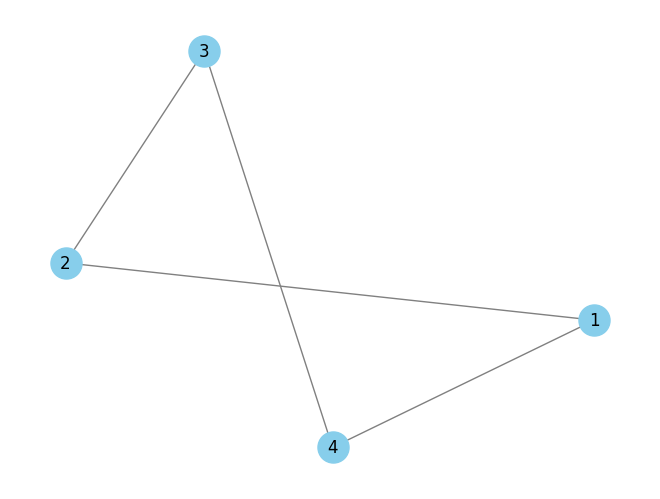

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义用户列表和边列表
users = [1, 2, 3, 4]
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]

# 创建无向图
G = nx.Graph()

# 添加节点
G.add_nodes_from(users)

# 添加边
G.add_edges_from(edges)

# 绘制图形
nx.draw(G, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray')

# 显示图形
plt.show()

7.根据以下数据建立可视化有向图

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

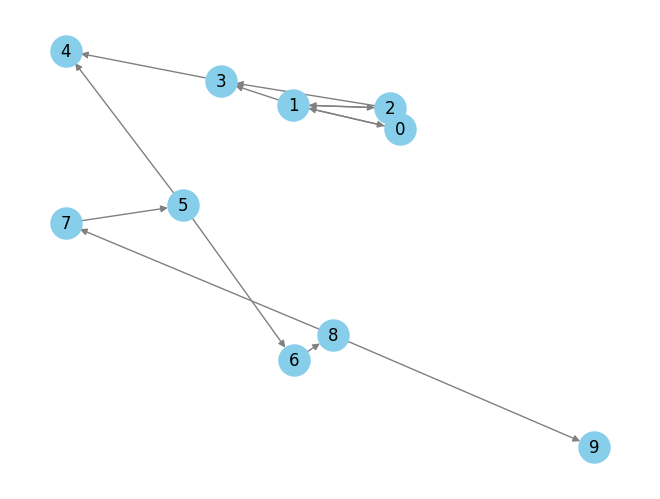

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()

G.add_nodes_from(users)
G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray', arrows=True)

plt.show()

8.针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。 

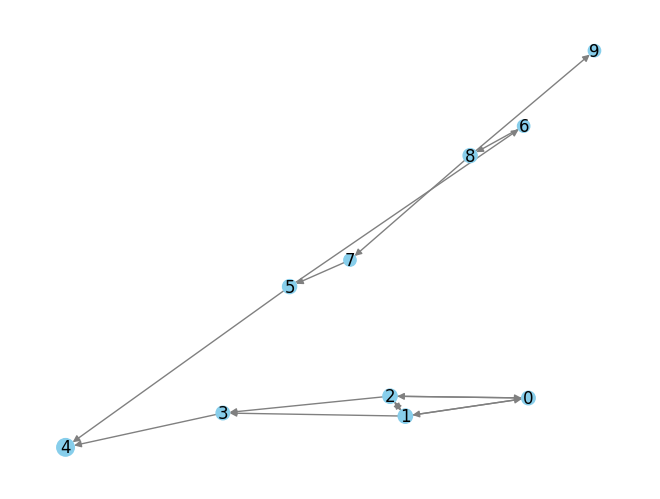

每个节点的 PageRank 值：
节点 0: PageRank 值为 0.09499069584253748
节点 1: PageRank 值为 0.10547659652084884
节点 2: PageRank 值为 0.10547659652084884
节点 3: PageRank 值为 0.09499069584253748
节点 4: PageRank 值为 0.15931683334639937
节点 5: PageRank 值为 0.1020112395832942
节点 6: PageRank 值为 0.0785753675867465
节点 7: PageRank 值为 0.0785753675867465
节点 8: PageRank 值为 0.1020112395832942
节点 9: PageRank 值为 0.0785753675867465


In [26]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()

G.add_nodes_from(users)
G.add_edges_from(edges)

# 计算 PageRank 值
pageranks = nx.pagerank(G)

# 根据 PageRank 值调整节点大小
node_sizes = [pageranks[node] * 1000 for node in G.nodes()]

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', edge_color='gray', arrows=True)

plt.show()

print("每个节点的 PageRank 值：")
for node, pr in pageranks.items():
    print(f"节点 {node}: PageRank 值为 {pr}")